This workbook is designed to walkthrough usage of ImageSegmenter (2023.02.01) for doing thresholding and getting results out.

This implementationm uses novel bright-dark edge detection schemes and pixel-based classifier.

In [1]:
import sys
sys.path.append("..")
from Utility.segmentation_utils import *
import matplotlib.pyplot as plt

In [2]:
# Use this cell to define image of interest
# Two Image Segmenters are made, one default and the other with modificaitons
# Use these in tandem to ocmpare and contrast! 
img_path = "../Images/Training/39.5 hold 1.bmp"

IS_default = ImageSegmenter(img_path,top_boundary=0,bottom_boundary=920,override_exists=True,
                            file_str = "default"
                   )

IS_mod = ImageSegmenter(img_path,top_boundary=0,bottom_boundary=920,override_exists=True, 
                    threshold_mode="pixel", # This uses the pixel base classifier, can set to "otsu"
                    edge_modification="dark_bright",
                    file_str = "modded" # Use this to define the saved ID extension
                   )

Image Segmenter on 39.5 hold 1 created!


/home/jacob/anaconda3/envs/colloidal_crystal/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.0 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/jacob/anaconda3/envs/colloidal_crystal/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.0 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


dark_bright
(3, 3)
Image Segmenter on 39.5 hold 1 created!


In [3]:
IS_default.create_csv()
IS_mod.create_csv()

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77 

[ 0.         1.         1.4        2.         2.1969     2.8
  3.         3.1969     3.5969     4.         4.1969     4.2
  4.3938     4.9968996  5.         5.1969     5.3938     5.6
  5.7938     6.         6.1969     6.3938     6.3968997  6.5906997
  7.         7.1937995  7.1969     7.3938     7.5906997  7.7969
  7.9907     8.         8.196899   8.3938     8.4        8.5907
  8.5938     8.7876     9.         9.196899   9.390699   9.3938
  9.5907     9.7876     9.799999   9.993799  10.        10.187599
 10.196899  10.393799  10.3938    10.5907    10.596899  10.7876
 10.790699  10.984499  11.        11.196899  11.199999  11.393799
 11.3938    11.587599  11.5907    11.7876    11.984499  11.996899
 12.        12.190699  12.196899  12.384499  12.393799  12.3938
 12.590698  12.5907    12.599998  12.7876    12.793798  12.984499
 12.987598  13.        13.181398  13.196899  13.393799  13.3938
 13.396898  13.590698  13.5907    13.784498  13.7876    13.984499
 13.999998  14.        14.181398  14

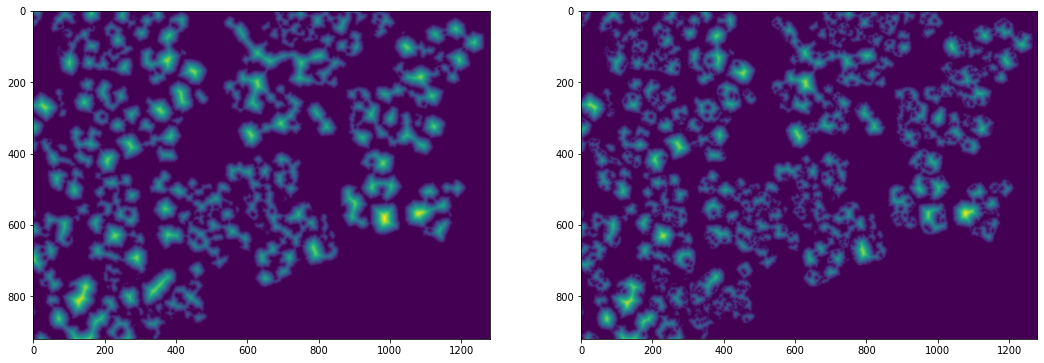

In [12]:
# Define which two images to look at side by side. Possible interests are:
# {markers,markers2,thresh,_dist_transform,_edge_highlight,_dark_edges,_original_thresh}
# Some of these are only created in modified version, so be wary!

im1 = IS_default._dist_transform#cv2.subtract(IS_default._bg_mark,IS_default._fg_mark)
im2 = IS_mod._dist_transform#cv2.subtract(IS_mod._bg_mark,IS_mod._fg_mark)

fig, ax = plt.subplots(1,2,figsize=(18,20))
ax[0].imshow(im1)
ax[1].imshow(im2)
print(np.unique(im1))
print(np.unique(im2))


Default regions: 180
Mod regions: 196


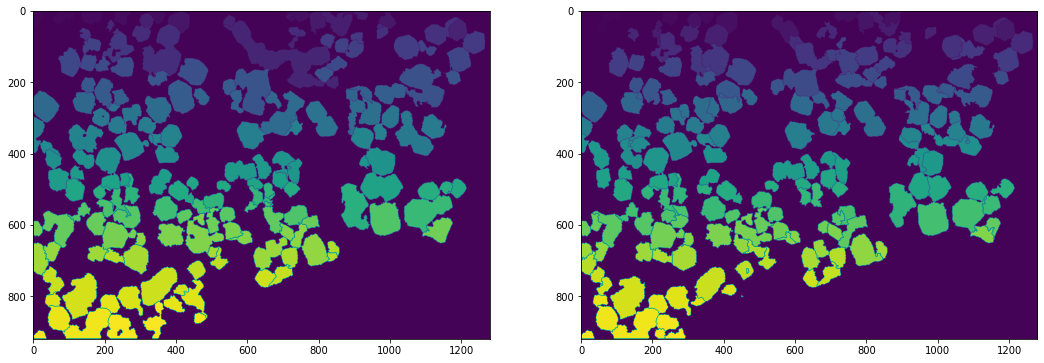

In [10]:
# Note: I believe this count is different than hte actually labeled regions 
# since things that are too small are automatically discounted

fig, ax = plt.subplots(1,2,figsize=(18,20))
ax[0].imshow(IS_default.markers2)
ax[1].imshow(IS_mod.markers2)
print(f"Default regions: {len(np.unique(IS_default.markers2))}")
print(f"Mod regions: {len(np.unique(IS_mod.markers2))}")